# Importing Libraries

In [3]:
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)

In [15]:
def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = dataset.x[:, 0].view(-1, 1).numpy()
    x2 = dataset.x[:, 1].view(-1, 1).numpy()
    y = dataset.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

# Data Prepration

In [5]:
class Data2D(Dataset):
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [6]:
dataset = Data2D()

# Create Model

In [9]:
class LR(nn.Module):
    def __init__(self, s, m):
        super(LR, self).__init__()
        self.linear = nn.Linear(s, m)
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [10]:
model = LR(2,1)
list(model.parameters())

[Parameter containing:
 tensor([[ 0.6209, -0.1178]], requires_grad=True),
 Parameter containing:
 tensor([0.3026], requires_grad=True)]

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [12]:
criterion = nn.MSELoss()

In [13]:
trainLoader = DataLoader(dataset=dataset, batch_size=2)

# Train the Model

Before training:


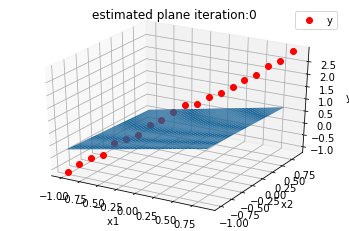

After training:


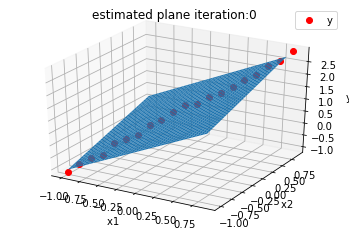

In [16]:
LOSS = []
print("Before training:")
Plot_2D_Plane(model, dataset)
epochs = 10
def train_model(epochs):
    for epoch in range(epochs):
        for x,y in trainLoader:
            yhay = model(x)
            loss = criterion(yhay, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
train_model(epochs)
print("After training:")
Plot_2D_Plane(model, dataset)